# +++++++++++++++++++
# Project 1 Homework
# +++++++++++++++++++

Date: Mon 31 July<br/>
Author: Rory Creedon<br/>
<a href=https://github.com/ga-students/DAT-NYC-7.24.17/blob/master/projects/unit-projects/project-1/readme.md>Instructions<a/>

In [31]:
#imports
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

/Users/rorycreedon1/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/rorycreedon1/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [8]:
#read data
url = "https://raw.githubusercontent.com/ga-students/DAT-NYC-7.24.17/master/projects/unit-projects/project-1/assets/admissions.csv?token=AFtddnOmRX-EVTq8JJhu83776FC40SdJks5ZiOZtwA%3D%3D"
df = pd.read_csv(url)

In [10]:
#display some data
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


---

### Task 1: Create a data dictionary

Before creating the data dictionary, a preliminary look at the data is required:

In [11]:
#length of data
len(df)

400

In [12]:
#number of non-null values
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [27]:
# values
for col in 'admit', 'gre', 'gpa', 'prestige':
    print col
    print df[col].value_counts(dropna=False,).iloc[:5]
    print

admit
0    273
1    127
Name: admit, dtype: int64

gre
620.0    30
580.0    28
540.0    27
800.0    25
560.0    24
Name: gre, dtype: int64

gpa
4.00    28
3.31     8
3.15     7
3.35     7
3.45     7
Name: gpa, dtype: int64

prestige
 2.0    150
 3.0    121
 4.0     67
 1.0     61
NaN       1
Name: prestige, dtype: int64



**Data Dictionary**

| Name  | Variable Type | Permitted Values | Required | Notes |
|-------|---------------|------------------|----------|-------|
| admit |  Dichotomous  | 0, 1             |    yes   | Indicates if canditate admitted. 1= Yes, 0 = No      |
| gre   |   Continuous            |                  |     no     |   gre score    |
| gpa   |   Continuous           |      0 -4            |       no   |    gpa score   |
| prestige | Ordinal    | 1, 2, 3, 4                | no         | Prestige of school applied to 1 = most prestigious, 4 = least

---

### Task 2: Write a Problem Statement


Predict which prospective students will be admitted to applied-to colleges using information collected from college applications (GRE, GPA). Determine if more accurate predictions can be made when partitioning the applications by the prestige of the school as measured by the "prestige" variable. 

---

### Task 3: Features of the Datset

1. The outcome variable is 'admit'
2. The predictors are gre and gpa
3. The data are assumed to come from college applications
4. The timeline of the data is not clear
5. One hypothesis is that the probability of admission to college is increasing with gre and gpa

---

### Exploratory Analysis


The goals of the exploratory analysis are to look for preliminary relationships between variables that can be exploited later in the anlaysis. Addionally exploratory analysis helps to understand the data better. Specifically of interest would be:

+ standard deviation (to see the spread of the data)
+ frequency distributions (using histograms). These distributions can also be viewed by prestige to understand how distributions vary with school quality. 
+ creating a covariance/correlation matrix to understand preliminary associations

We assume that admission is rising linearly with gpa and gre. A preliminary analsyis can be done by plotting admit against gpa and gre in a line graph format. 

Scatter plots can be used to visually inspect for the presence of outliers. Outliers can produce spurious correlations and statistical methods can be used to identify them so that they can be dropped if necessary from the data. 

In [29]:
#briefly describe the data
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [33]:
df.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0b2310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a329f10>]], dtype=object)

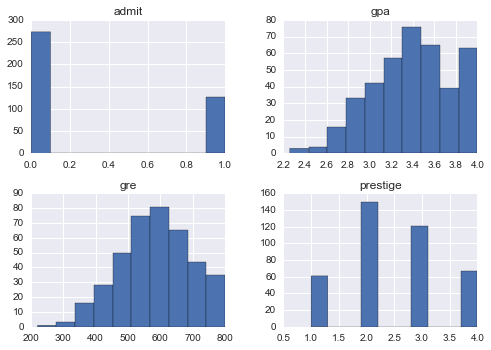

In [32]:
#frequency counts for full data set
df.hist()

In [34]:
#cross tabs admit by prestige
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


In [38]:
#mean of values by prestige
df.groupby('prestige').agg('mean')


,admit,gre,gpa
prestige,,,
1.0,0.540984,611.803279,3.453115
2.0,0.353333,596.621622,3.364027
3.0,0.231405,574.876033,3.432893
4.0,0.179104,570.149254,3.318358


prestige:  1
prestige:  2
prestige:  3
prestige:  4


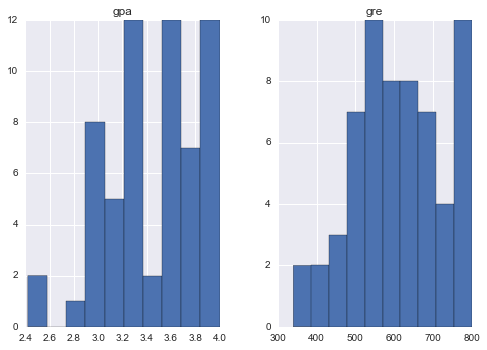

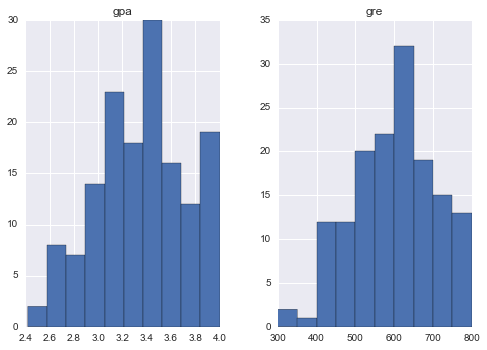

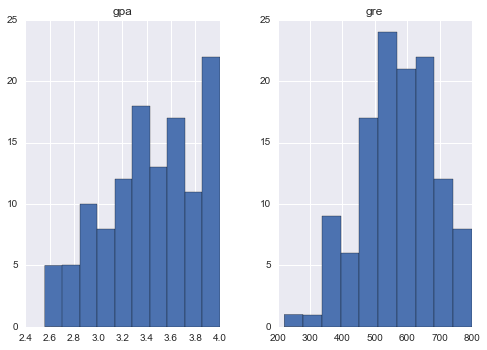

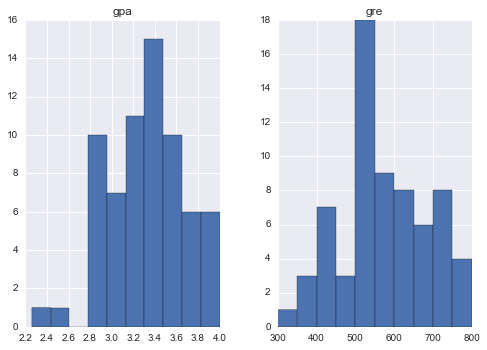

In [44]:
#histograms by prestige
for val in xrange(1,5):
    print "prestige: ", val
    df[df['prestige']==val][['gpa', 'gre']].hist()

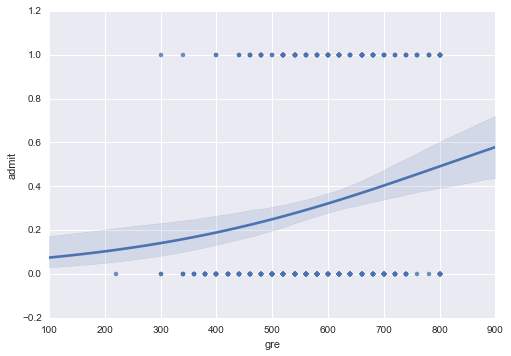

In [47]:
#relationship of admit and gre
sns.regplot(x="gre", y="admit", data=df, logistic=True);

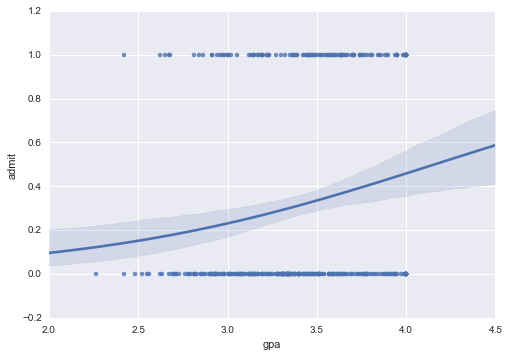

In [49]:
#relationship of admit and gpa
sns.regplot(x="gpa", y="admit", data=df, logistic=True);